In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [23]:
X_train_pd = pd.read_csv('Training_Data/Diabetes_XTrain.csv')
y_train_pd = pd.read_csv('Training_Data/Diabetes_YTrain.csv')
X_test_pd = pd.read_csv('Test_Cases/Diabetes_Xtest.csv')
submission = pd.read_csv('Test_Cases/sample_submission.csv')

In [24]:
X_train_pd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [25]:
y_train_pd

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [26]:
submission

,Outcome
0,1
1,1
2,1
3,1
4,1
...,...
187,1
188,1
189,1
190,1


In [27]:
x = y_train_pd['Outcome'].value_counts()

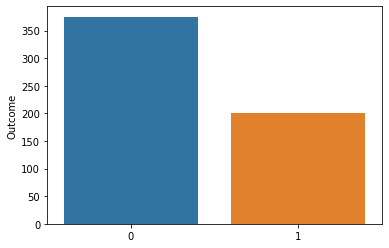

In [28]:
sns.barplot(x.index,x)

In [38]:
X_train_np = np.array(X_train_pd)
y_train_np = np.array(y_train_pd)
X_test_np = np.array(X_test_pd)

In [39]:
sc_X = StandardScaler()

In [40]:
X_train_sc = sc_X.fit_transform(X_train_np)
X_test_sc = sc_X.transform(X_test_np)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_train_sc, y_train_np, test_size=0.33, random_state=42)

In [44]:
y_test.flatten()

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [49]:
acc = []
for i in range(2,70):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train.flatten())
    acc.append(model.score(X_test,y_test.flatten()))

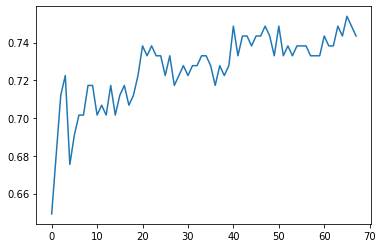

In [50]:
plt.plot(acc)

In [47]:
acc

[0.6492146596858639,
 0.680628272251309,
 0.7120418848167539,
 0.7225130890052356,
 0.675392670157068,
 0.6910994764397905,
 0.7015706806282722,
 0.7015706806282722,
 0.7172774869109948,
 0.7172774869109948,
 0.7015706806282722,
 0.7068062827225131,
 0.7015706806282722,
 0.7172774869109948,
 0.7015706806282722,
 0.7120418848167539,
 0.7172774869109948,
 0.7068062827225131,
 0.7120418848167539,
 0.7225130890052356,
 0.7382198952879581,
 0.7329842931937173,
 0.7382198952879581,
 0.7329842931937173,
 0.7329842931937173,
 0.7225130890052356,
 0.7329842931937173,
 0.7172774869109948,
 0.7225130890052356,
 0.7277486910994765,
 0.7225130890052356,
 0.7277486910994765,
 0.7277486910994765,
 0.7329842931937173,
 0.7329842931937173,
 0.7277486910994765,
 0.7172774869109948,
 0.7277486910994765]

In [96]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_np,y_train_np.flatten())
y_pred = model.predict(X_test_sc)

In [97]:
submission['Outcome'] = pd.DataFrame(y_pred)

In [98]:
submission

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,1
189,1
190,1


In [99]:
submission.to_csv('submission.csv',index=False)